<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/I_V_Characteristics_of_Superconductors_and_JJs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

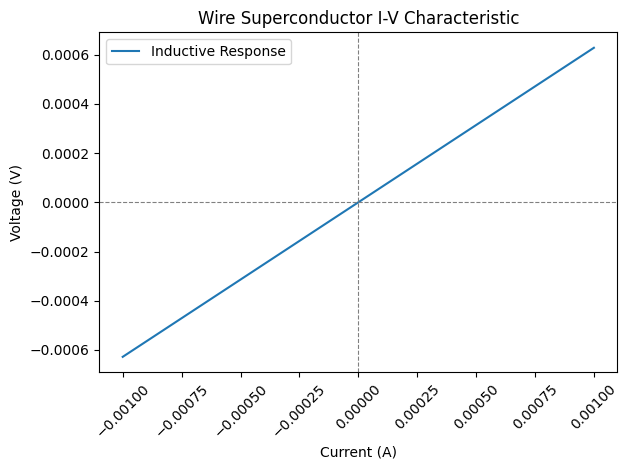

In [13]:
# For a continuous superconducting wire at low currents (below its critical current), behavior is primarily inductive and effectively linear in this range.

import numpy as np
import matplotlib.pyplot as plt

# Inductance (e.g., 10 nH)
L = 10e-9
# Frequency in Hz (e.g., 10 MHz)
f = 10e6
omega = 2 * np.pi * f

# Current range from -1 mA to +1 mA
I_vals = np.linspace(-1e-3, 1e-3, 200)

# Voltage based on linear inductance: V = ωL * I
V_vals = omega * L * I_vals

fig, ax = plt.subplots()

# Plotting
ax.plot(I_vals, V_vals, label='Inductive Response')
ax.axhline(0, color='gray', linewidth=0.8, linestyle='--')
ax.axvline(0, color='gray', linewidth=0.8, linestyle='--')

# Refined labels and title
ax.set_xlabel('Current (A)')
ax.set_ylabel('Voltage (V)')
ax.set_title('Wire Superconductor I-V Characteristic')

# Show legend
ax.legend()

# Rotate tick labels and tighten layout
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

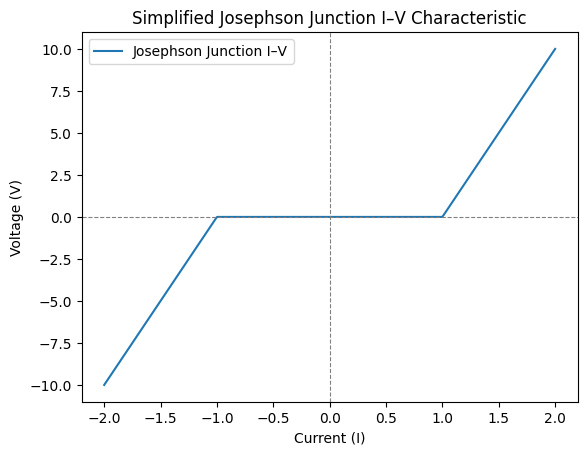

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def josephson_iv(I, Ic=1.0, Rn=10.0):
    """
    Return the voltage across a simplified Josephson junction.
    Piecewise definition:
      - For |I| <= Ic:  V = 0 (supercurrent branch)
      - For I >  Ic:    V = (I - Ic) * Rn
      - For I < -Ic:    V = (I + Ic) * Rn
    """
    V = np.zeros_like(I)
    # Region where |I| < Ic => zero voltage
    idx_sc = np.where(np.abs(I) <= Ic)[0]
    # Region where I > Ic => ohmic
    idx_pos = np.where(I > Ic)[0]
    # Region where I < -Ic => ohmic
    idx_neg = np.where(I < -Ic)[0]

    V[idx_sc] = 0.0
    V[idx_pos] = (I[idx_pos] - Ic) * Rn
    V[idx_neg] = (I[idx_neg] + Ic) * Rn
    return V

# Define parameters
Ic = 1.0    # Critical current
Rn = 10.0   # Normal-state (shunt) resistance

# Current sweep from negative to positive
I_vals = np.linspace(-2.0, 2.0, 400)

# Compute voltage
V_vals = josephson_iv(I_vals, Ic, Rn)

# Plot
plt.plot(I_vals, V_vals, label='Josephson Junction I–V')
plt.axhline(y=0, color='gray', linewidth=0.8, linestyle='--')
plt.axvline(x=0, color='gray', linewidth=0.8, linestyle='--')
plt.xlabel('Current (I)')
plt.ylabel('Voltage (V)')
plt.title('Simplified Josephson Junction I–V Characteristic')
plt.legend()
plt.show()


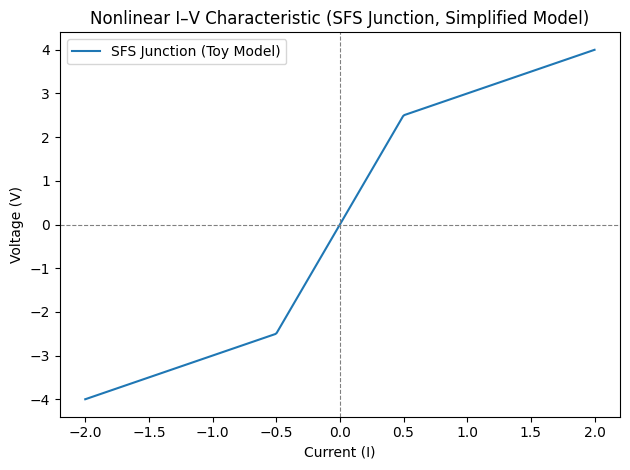

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def sfs_junction_iv(I, Ic=0.5, R_subgap=5.0, R_normal=1.0):
    """
    Simplified piecewise I-V model for an SFS junction:

    1) For |I| <= Ic: sub-gap (finite, small slope)
       V = R_subgap * I
       (represents weak conduction even below critical current due to
        the ferromagnetic layer altering the gap structure)

    2) For |I| > Ic: 'normal-like' conduction
       V = R_normal * (|I| - Ic) * sign(I) + R_subgap * Ic * sign(I)
       (once beyond Ic, the junction transitions to a higher conduction state)

    Parameters:
    -----------
    I : array-like
        Current values.
    Ic : float
        'Critical' current threshold for the piecewise transition.
    R_subgap : float
        Effective sub-gap resistance (small slope region).
    R_normal : float
        Resistance in the 'normal-like' region above Ic.

    Returns:
    --------
    V : array-like
        Voltage across the SFS junction for each current in I.
    """
    # Prepare output array
    V = np.zeros_like(I)

    # Region 1: |I| <= Ic => Sub-gap conduction
    idx_subgap = np.abs(I) <= Ic

    # Region 2: |I| > Ic => Normal-like conduction
    idx_normal = np.abs(I) > Ic

    # Sub-gap voltage:
    V[idx_subgap] = R_subgap * I[idx_subgap]

    # Above Ic: piecewise formula
    #   V = R_subgap * Ic * sign(I) + R_normal * (|I| - Ic) * sign(I)
    # (ensuring continuity at I = ±Ic)
    I_normal = I[idx_normal]
    sign_I = np.sign(I_normal)
    V[idx_normal] = (R_subgap * Ic * sign_I +
                     R_normal * (np.abs(I_normal) - Ic) * sign_I)

    return V

# Create a current sweep that goes from negative to positive
I_min, I_max = -2.0, 2.0
num_points = 400
I_vals = np.linspace(I_min, I_max, num_points)

# Calculate the voltage using our toy SFS model
# You can tweak Ic, R_subgap, and R_normal to see different shapes
Ic = 0.5
R_subgap = 5.0   # A relatively large subgap resistance
R_normal = 1.0   # Lower resistance once beyond Ic
V_vals = sfs_junction_iv(I_vals, Ic=Ic, R_subgap=R_subgap, R_normal=R_normal)

# Plot the result
plt.figure()
plt.plot(I_vals, V_vals, label='SFS Junction (Toy Model)')
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')
plt.xlabel('Current (I)')
plt.ylabel('Voltage (V)')
plt.title('Nonlinear I–V Characteristic (SFS Junction, Simplified Model)')
plt.legend()
plt.tight_layout()
plt.show()